# Machine Learning Engineer Nanodegree
## Deep Q-Network: Reinforcement Learning with TensorFlow&OpenAI Gym

----
## 1. Basic Environment

We can simulate this game using [OpenAI Gym](https://gym.openai.com/). First, let's check out how OpenAI Gym works. Then, we'll get into training an agent to play the FrozenLake game. 

FrozenLake is that a agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

In [1]:
import gym #Import 'OpenAIGym'

env = gym.make("FrozenLake-v0") #Make basic environment
observation = env.reset() #Initialize the agent

[2017-08-14 22:48:20,505] Making new env: FrozenLake-v0


We interact with the simulation through `env`. To show the simulation running, you can use `env.render()` to render one frame. Passing in an action as an integer to `env.step` will generate the next step in the simulation.  You can see how many actions are possible from `env.action_space` and to get a random action you can use `env.action_space.sample()`. In the FrozenLake game, there are 4 possible actions, moving the agent up, down, left or right. And there are two rewards we can take, encoded as 0 and 1.

* env.render() : display envoronment
* env.action_space.sample() : the agent action
* env.step() : execute step and get infomations

![frozen_lake_agent](images/frozen_lake_agent.png)

In [2]:
env.render() #Display environment
action = env.action_space.sample() #The agent action.
observation, reward, done, info = env.step(action) #Execute step and get infomations


SFFF
FHFH
FFFH
HFFG


There is 4x4 grid environment.      
    SFFF       (S: starting point, safe)    
    FHFH       (F: frozen surface, safe)    
    FFFH       (H: hole, fall to your doom)    
    HFFG       (G: goal, where the frisbee is located)    
    
There is the FrozenLake map that we made. 

![frozen_lake_1](images/frozen_lake_1.png)

In this game, the episode ends when you reach the goal or fall in a hole. The agent receive a reward of 1 if it reach the goal, and zero otherwise. So, our final goal is that we get a reward of 1.

----
## 2. Basic Q-table

But, We are stuck. Because we don't know where the holes are. There is the real FrozenLake map for our agent.

![frozen_lake_2](images/frozen_lake_2.png)

We can train the agent by random actions. But, as you know, it isn't efficient. So, we need other solution. The solution is that:  
> Even if you know the way, **ask** one more time. - Korean proverbs

Before we action, the agent should ask to someone. This is [Q-learning](https://en.wikipedia.org/wiki/Q-learning). Q-learning is a model-free reinforcement learning technique. Specifically, Q-learning can be used to find an optimal action-selection policy for any given (finite) Markov decision process (MDP). It works by learning an action-value function that ultimately gives the expected utility of taking a given action in a given state and following the optimal policy thereafter. A policy is a rule that the agent follows in selecting actions, given the state it is in. When such an action-value function is learned, the optimal policy can be constructed by simply selecting the action with the highest value in each state. One of the strengths of Q-learning is that it is able to compare the expected utility of the available actions without requiring a model of the environment. Additionally, Q-learning can handle problems with stochastic transitions and rewards, without requiring any adaptations. It has been proven that for any finite MDP, Q-learning eventually finds an optimal policy, in the sense that the expected value of the total reward return over all successive steps, starting from the current state, is the maximum achievable. 

There is a simple Q-learning function. If we give the state and action as parameters, the function will return optimized value. 

![q_table](images/q_table.png)

Here is an example. Suppose the agent is on the 's1'.

| Q-function: Q(state, action) 	| reward 	|
|:-------:	|:------:	|
|   Q(s1, Up)  	|  0   |
|   Q(s1, Down)   	|  0.3  |
|   Q(s1, Left)   	| 0  |
|   Q(s1, Right)   	|  0.5  |

This table shows reward according to each actions on the 's1'. We can choose a action that gives the greatest reward. In this case, it is 'Right'. So, here is a equation:

$$
\pi^{*}{(s)} = {\operatorname{argmax}}{Q(s, a)}
$$

where $s$ is a state, $a$ is an action, and $\pi$ is a policy, $^{*}$ is meaning of optimization. So, if $r$ is a reward, we can calculate sum of rewards:

$$
R = r_1 + r_2 + r_3 + \dots + r_n
$$

$$
R_t = r_t + r_{t+1} + r_{t+2} + \dots + r_n
$$

$$
R_t = r_t + R_{t+1}
$$

When $s'$ is the next state from state $s$ and action $a$. We should assume ${Q(s', a')}$ is exist. So, We train our Q-learning agent using the equation:

$$
{Q(s, a)} = r + \max{Q(s', a')}
$$


![q_table_equation](images/q_table_equation.png)

Finally, we get a optimize function ${Q(s, a)} = r + \max{Q(s', a')}$. Let's dive in to the deep. First of all, we should initialize by zero.

![q_table_init](images/q_table_init.png)

And we should update our Q-table by many trials. The agent can receive a reward of 1 only when move to the right on $s_{14}$. So, before the agent arrives on $s_{14}$, we couldn't get any reward(always get a reward of zero). And return value of Q-function is also zero. So, we shouldn't update any value. But, after many trials, let's assume that the agent is on $s_{14}$. In this case, finally we can get a reward. because ${Q(s_{14}, a_{right})}$ will return a reward of 1. And, $\max{(Q(s_{15}, a))}$ is 0. Because, $s_{15}$ cell is our goal. So, we should update ${Q(s_{14}, a_{right})} = 1$.

$$
{Q(s, a)} = r + \max{Q(s', a')}
$$

$$
{Q(s_{14}, a_{right})} = 1 + 0 = 1
$$

![q_table_reward](images/q_table_reward.png)

After $s_{14}$ state was updated, let's assume that the agent is on $s_{13}$ like before example($s_{14}$). In this case, ${Q(s_{13}, a_{right})}$ couldn't get a reward. But, $\max{Q(s', a')}$ is 1. Because, $s'$ is $s_{14}$. So, $\max{Q(s', a')}$ is ${Q(s_{14}, a_{right})}$. So, we should update ${Q(s_{13}, a_{right})} = 1$

$$
{Q(s, a)} = r + \max{Q(s', a')}
$$

$$
{Q(s_{13}, a_{right})} = r + \max{Q(s_{14}, a')} = 0 + {Q(s_{14}, a_{right})} = 1
$$

![q_table_reward_2](images/q_table_reward_2.png)

In conclusion, we can summarize our first algorithm.

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * Select an action $a$ and execute it
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $\hat{Q}(s, a) \leftarrow r + \max\hat{Q}(s', a')$
    * $s \leftarrow s'$
    
$\hat{Q}$ denote learner's current approximation to $Q$. According to [Tom Mitchell](https://www.amazon.com/Machine-Learning-Tom-M-Mitchell/dp/0070428077/ref=sr_1_2?ie=UTF8&qid=1501476742&sr=8-2&keywords=tom+mitchell+machine+learning), $\hat{Q}$ converge to $Q$ when it is in deterministic worlds and in finite states.
    
Time to implement our first Q-learning. First of all, we should set FrozenLake environment. 

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector): #https://gist.github.com/stober/1943451
    m = np.amax(vector) #Return the maximum of an array or maximum along an axis.
    indices = np.nonzero(vector == m)[0] #Return the indices of the elements that are non-zero.
    #x = np.array([[1,0,0], [0,2,0], [1,1,0]])
    #np.nonzero(x) : (array([0, 1, 2, 2]), array([0, 1, 0, 1]))
    #[0, 0], [1, 1], [2, 0], [2, 1] are 'nonzero'

    return pr.choice(indices) 
    #If there are duplicate values, Nunmpy returns the first value. 
    #So, we use random.choice to return random index

register(
    id='FrozenLake-v1',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
) #Environment setting

env = gym.make("FrozenLake-v1") #Environment generate

[2017-08-14 22:48:21,472] Making new env: FrozenLake-v1


Then, Let's implement the Q-learning.

In [34]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes): 
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    #The Q-learning algorithm with table
    while not done:
        action = rargmax(Q[state, :]) #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + np.max(Q[new_state, :]) #Update table with new knowledge using learning rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)
        
    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.

According to result, after learning, we can see that the agent always succeeds.

Success rate: 0.9565
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


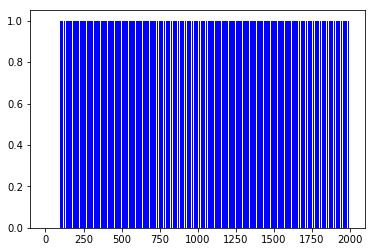

In [35]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

And here is the map that updated all the states.

![frozen_lake_3](images/frozen_lake_3.png)

But, we can find a problem. The problem is that the agent's route isn't optimized.

![frozen_lake_finish_1](images/frozen_lake_finish_1.png)

Our route is red line. But, optimized route is green line. Although we got a correct reward of 1, it isn't efficient route. In our case, to learn about the environment and rules of the game, the agent needs to explore by taking random actions even though these actions haven't optimal values.

----
## 3. Optimized Q-table with Exploit and Exploration

Why isn't the first algorithm optimized? Let's see the algorithm again:

$$
\pi^{*}{(s)} = {\operatorname{argmax}}{Q(s, a)}
$$

where $s$ is a state, $a$ is an action, and $\pi$ is a policy, $^{*}$ is meaning of optimization. According to this equation, the agent should move to next state that has the greatest value. So, although other route has more efficient way, the agent always moves in the same way. This is the problem of our first algorithm.

To improve our algorithm, although other state has small value, sometimes the agent should move to there. Let's call this method as **Exploit VS Exploration**. A simple key of this strategy is that sometimes the agent should move randomly. Here is a example in real life. I'm a big fan of Burger King Whopper. And I like McDonald's Big Mac too. But, I don't like KFC and Popeyes. If I express this as a score, here is my preference of food chains.

![junk_food_reward](images/junk_food_reward.png)

Even though I want Big Mac to eat sometimes, according to our first algorithm, I will always go to Burger King. Because Burger King has the greatest preference value. And, I can't find a new delicious hamburger in other food chains. So, I decided to change my strategy. I will go to Burger King in weekdays, because it is my best food chain **(Exploit)**. But I will go to other food chain in weekend to find a new delicious hamburger **(Exploration)**. There are two ways to improve our strategy. 

The first is called an **$\epsilon$-greedy policy**. The main concept of this method is that set a small probability. Let's call this probability $\epsilon$ (epsilon). The agent will choose random action with $\epsilon$ probability. Contrary, it will choose an action from ${Q(s, a)}$ with $1 - \epsilon$ probability.

```
e = 0.1
if rand < e:
    a = random
else:
    a = argmax(Q(s, a))
```

So, I will go to Burger King with a 90% chance. And I will go to other food chains with 10% chance. Like this, the agent will follow ${Q(s, a)}$ with 90% chance. And the agent will find new way with a 10% chance. But, this strategy isn't efficient. Because, as learning progresses, the agent need to find a new way less and less. So, at first, the agent needs to do a lot of exploring. Later when it has learned more, the agent can favor choosing actions based on what it has learned. This is called exploitation. We'll set it up so the agent is more likely to explore early in training, then more likely to exploit later in training. The is called an **decaying $\epsilon$-greedy policy**.

```
for i in range(1000):
    e = 0.1 / (i+1)
    
    if random(1) < e:
        a = random
    else:
        a = argmax(Q(s, a)) 
```

According to this, as time passes, $\epsilon$ is decreased. So, later when it has learned more, the agent can choose action based on what it has learned than random action.

And the second is called an **add random noise**. The concept of this method is that just add random value to each action. 

![junk_food_random_value](images/junk_food_random_value.png)

$$
{a} = {\operatorname{argmax}}{Q(s, a) + {RandomValue}}
$$

$$
{a} = {\operatorname{argmax}}{([0.3, 0.9, 0.2, 0.7] + [0.2, 0.1, 0.4, 0.5])}
$$

In this case, we will choose McDonald's. And also we can use decaying policy with add random noise.

```
for i in range(1000):
    a = argmax(Q(s, a) + random_value / (i+1))
```

Comparing **$\epsilon$-greedy policy** and **add random noise**, when the agent choose random action in $\epsilon$-greedy policy, it is totally random. But same case in add random noise, since the noise_values  are added to the existing $Q(s, a)$ values, it is affected by Q-learning function value even though the agent will choose random action. So, the probability that an action has a high Q-leaning value is selected is higher than $\epsilon$-greedy policy. Let's check our first algorithm again:

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * **Select an action $a$ and execute it**
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $\hat{Q}(s, a) \leftarrow r + \max\hat{Q}(s', a')$
    * $s \leftarrow s'$

In this algorithm, we didn't tell how to select an action and execute it. Now, the agent will select an action with **$\epsilon$-greedy policy** or **add random noise**. Now, let's implement the Q-learning with add random noise.

Success rate: 0.9295
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


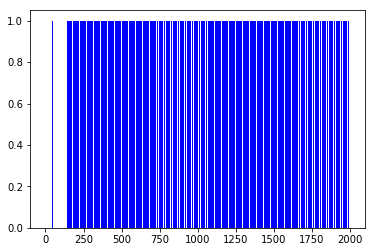

In [63]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + np.max(Q[new_state, :]) #Update table with new knowledge using learning rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

And here is the map that updated all the states.

![frozen_lake_with_EE](images/frozen_lake_with_EE.png)

But, this algorithm has some problems too. If the agent is on $s_{10}$, where should the agent go?

![where_will_you_go](images/where_will_you_go.png)

----
## 4. Optimized Q-table with Discounted reward

So, we need a solution. The problem with our algorithm is that all the reward is 1. There are two reward in this game: present reward and future reward. However, our algorithm doesn't distinguish between them. So, we should update our algorithm to distinguish current reward and future reward. We will give a weight to the present reward. 
Getting immediate reward is better than delayed reward. Here is our new Q-learning equation:

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

where $\gamma$ is weight. In this case, $r$ is present reward and $\max{Q(s', a')}$ is future reward. Because we need reduce future reward, $\gamma$ should be less than 1. Let's update the map again using this formula when $\gamma$ is 0.9.

![discounted_reward_1](images/discounted_reward_1.png)

$s_{15}$ is our goal. So, $Q(s_{14}, a_{right})$ is 1. 

![discounted_reward_2](images/discounted_reward_2.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{13}, a) = 0 + 0.9\cdot{Q(s_{14}, a_{right})} = 0.9
$$

![discounted_reward_3](images/discounted_reward_3.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{9}, a) = 0 + 0.9\cdot{Q(s_{13}, a_{right})} = 0.9\cdot0.9 = 0.81
$$

![discounted_reward_4](images/discounted_reward_4.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{10}, a) = 0 + 0.9\cdot{Q(s_{9}, a_{down})} = 0.9\cdot0.9\cdot0.9 = 0.72
$$

Like this way, we can update $Q(s_{10}, a_{down})$.

![discounted_reward_5](images/discounted_reward_5.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{10}, a) = 0 + 0.9\cdot{Q(s_{14}, a_{right})} = 0.9
$$

Finally, the agent can distinguish optimized route. On $s_{10}$, the agent will choose $a_{down}$.

![discounted_reward_6](images/discounted_reward_6.png)

In conclusion, we can summarize our final algorithm.

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * Select an action $a$ and execute it
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $\hat{Q}(s, a) \leftarrow r + \gamma\max\hat{Q}(s', a')$
    * $s \leftarrow s'$

Success rate: 0.9455
Final Q-Table Values
LEFT           DOWN        RIGHT       UP
[[ 0.          0.          0.95099005  0.        ]
 [ 0.          0.          0.96059601  0.        ]
 [ 0.          0.970299    0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.970299    0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


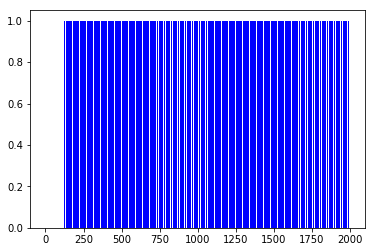

In [97]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

# Discount factor
dis = .99

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + dis * np.max(Q[new_state, :]) #Update table with new knowledge using decay rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT           DOWN        RIGHT       UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

And, here is the reward map.

![frozen_lake_discounted_reward](images/frozen_lake_discounted_reward.png)

----
## 5. Q-table in real world

Like the name of the game 'Frozenlake', let's think we're on an real frozen lake. The place will be very slippery. So, although we should move carefully, we couldn't move accurately. For instance, we tried to move to right, but we could slip down. In previous environment, the agent could move accurately. Because it is artificial environment. But we can set more realistic environment. We call this environment as **Stochastic model**.

* **Deterministic models** : the output of the model is fully determined by the parameter values and the initial conditions initial conditions.
* **Stochastic models** : possess some inherent randomness. The same set of parameter values and initial conditions will lead to an ensemble of different outputs.

In [98]:
register(
    id='FrozenLake-v2',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True} #changing is_slippery value.
) #Environment setting

env = gym.make("FrozenLake-v2") #Environment generate


[2017-08-14 23:48:32,879] Making new env: FrozenLake-v2


We can make Stochastic model by changing 'is_slippery' value to True.

In [99]:
for _ in range(3):
    env.render() #Display environment
    action = env.action_space.sample() #The agent action.
    observation, reward, done, info = env.step(action) #Execute step and get infomations


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


According to results, The agent doesn't move as we expected. Let's apply our previous algorithm.

Success rate: 0.0175
Final Q-Table Values
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.94148015  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.9801      0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


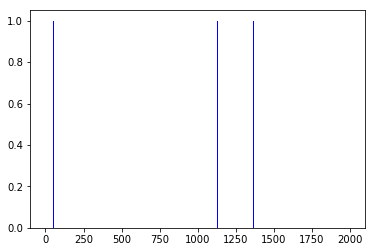

In [100]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

# Discount factor
dis = .99

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + dis * np.max(Q[new_state, :]) #Update table with new knowledge using decay rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

Totally failed. We need new solution. The solution is simple:
> Two heads are better than one

Like our life mentors. Don’t just listen and follow one mentor. we need our own solutions. In previous model, we just accept Q-function completely. So, our new algorithm is that listen to $Q(s')$ just little bit(mentor's solution) and update $Q(s)$ little bit(our own solution). So, we will update $Q(s)$ by learning rate. 

There is our previous equation:

$$
Q(s, a) \leftarrow r + \gamma \max{Q(s', a')}
$$

And Here is a new equation:

$$
Q(s, a) \leftarrow (1-\alpha){Q(s, a)} + \alpha[r + \gamma \max{Q(s', a')}]
$$

$$
Q(s, a) \leftarrow {Q(s, a)} + \alpha[r + \gamma \max{Q(s', a')} - {Q(s, a)}]
$$

where $\alpha$ is learning rate. And, let's update our algorithm.

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * Select an action $a$ and execute it
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $Q(s, a) \leftarrow (1-\alpha){Q(s, a)} + \alpha[r + \gamma \max{Q(s', a')}]$
    * $s \leftarrow s'$

Success rate: 0.6115
Final Q-Table Values
[[  1.08210979e-02   7.46309242e-03   3.06051519e-01   2.12066704e-02]
 [  2.40502037e-03   3.71279010e-04   3.60504955e-04   3.94463554e-01]
 [  1.00749816e-03   4.48085779e-03   2.60800052e-02   5.08232316e-01]
 [  3.59562682e-04   3.32146853e-04   2.34314043e-04   2.07065383e-01]
 [  3.43419227e-01   1.40591957e-03   1.54488529e-03   8.55525256e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.38919261e-05   1.13338607e-06   3.81154381e-01   3.26673185e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.91866980e-03   2.11832579e-04   1.47333601e-03   5.10590198e-01]
 [  1.20609857e-03   3.95101072e-01   0.00000000e+00   9.21845410e-04]
 [  5.99134465e-01   6.40217664e-05   3.64610072e-04   4.84819878e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.53832073e-03   1.22974936e-03

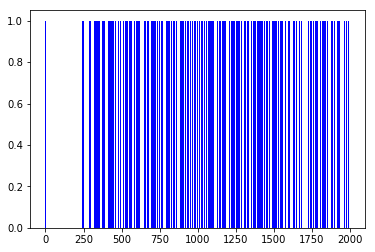

In [101]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

# Discount factor
dis = .99

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#Set learning rate
learning_rate = .85

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

According to result, after learning, we can see that the agent usually succeeds even though it is in stochastic environment.

----
## 6. Q-Network

We fully understood Q-learning! But think about it. Can we apply this model to real life or more complex environment? Maybe not. In previous environment, we just used 16 states and 4 actions. Even if you simply represent an image of 16 * 16 pixels by RGB, we should prepare $256^{16\cdot16}$ tables. So, we need more universal model: **Neural Network**.

![q_network](images/q_network.png)

Compared with the Q-table, The Q-network receives the state and returns all possible action values. In previous Frozenlake game, Let's apply the Q-network by example state:

$$
Q_{network}(s_{example}, a) = [0.5, 0.1, 0.0, 0.8]
$$

$[0.5, 0.1, 0.0, 0.8]$ represents $(a_{left}, a_{right}, a_{up}, a_{down})$.

![nn](images/nn.png)

In the Neural Network, when we put state into the input, we will receive reward as output.

$$
H(x) = Wx = \hat{Q}(s,a)
$$

where $H$ is hypothesis, $Wx$ is output of the Neural Network. So, we can calculate cost by [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error).

$$
cost(W) = \frac{1}{n}\sum_{i=1}^{n} (Wx_i - y_i)^2
$$

where $y$ is target label. In Q-learning, we don't have any target label because it is reinforcement learning. So, in this case, we will set target label as $Q(s, a)$. Because optimize $Q(s, a)$ is our goal.

$$
cost(W) = \frac{1}{n}\sum_{i=1}^{n} (Wx_i - y_i)^2
$$

$$
cost(W) = (Wx - y)^2
$$

$$
y =  r + \gamma\max{Q(s')}
$$

Let's approximate $Q^*$ function using weight:
$$
\hat{Q}(s, a|\theta) \to {Q}^*(s, a)
$$

where $\theta$ is weight. So, we try to optimize Q-function by using $s$, $a$ and $\theta$. So, we can choose $\theta$ to minimize using this equation:

$$
\min\sum_{t=0}^{T}[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta))]^2
$$

It looks complicated. But it is just same as optimizing weight in Linear regression by Mean squared error.

Putting all this together, we can list out the algorithm we'll use to train the network.

* Initialize action-value network $Q$ with random weights
* **For** episode = 1, $M$ **do**     
    Initialize sequence $s_1$ = {$x_1$} and preprocessed sequence $\phi_1 = \phi(s_1)$ 
  * **For** $t=1$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \max_a Q^*(\phi(s_t), a;\theta)$
     * Execute action $a_t$ in emulator and observe reward $r_t$ and image $x_{t+1}$
     * Set $s_{t+1}$ = $s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
     * Set$\;{y_j} = \left\{\begin{matrix}& r_{j}\;(for\;terminal\;\phi_{j+1})\\ & r_j + \gamma \max_{a'}{Q(\phi_{j+1}, a';\theta)} \;(for\;non-terminal\;\phi_{j+1})\end{matrix}\right.$
     * Perform a gradient descent step on $(y_j - Q(\phi_j, a_j;\theta))^2$
  * **endfor**
* **endfor**

In [102]:
def one_hot(x):
    return np.identity(16)[x: x+1]

To make one_hot encoding easier, we can make helper method. [np.identity](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) will return the identity array.

Percent of successful episodes: 0.435%


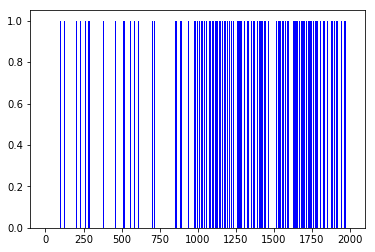

In [103]:
import tensorflow as tf

# Input and output size based on the Env
input_size = env.observation_space.n # 16 (4x4)
output_size = env.action_space.n # 4actions (Up, Down, Left, Right)
learning_rate = 0.1

# These lines establish the feed-forward part of the network used to
# choose actions
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32) # state input
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01)) # weight

Qpred = tf.matmul(X, W)  # Out Q prediction
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32) # Y label

loss = tf.reduce_sum(tf.square(Y - Qpred)) 
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# Set Q-learning related parameters
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
rList = []
init = tf.global_variables_initializer() #tf initialize

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        e = 1. / ((i / 50) + 10)
        rAll = 0
        done = False
        local_loss = []

        # The Q-Network training
        while not done:
            # Choose an action by greedily (with e chance of random action)
            # from the Q-network
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            # Get new state and reward from environment
            s1, reward, done, _ = env.step(a) 
            if done:
                # Update Q, and no Qs+1, since it's a terminal state
                Qs[0, a] = reward #When the agent got a reward, update Q
            else:
                # Obtain the Q_s1 values by feeding the new state through our
                # network
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)}) #Continue learning
                # Update Q
                Qs[0, a] = reward + dis * np.max(Qs1)

            # Train our network using target (Y) and predicted Q (Qpred) values
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})

            rAll += reward
            s = s1 #move to next state
        rList.append(rAll)

print("Percent of successful episodes: " +
      str(sum(rList) / num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

But actually this model isn't efficient. In other words, it has some problem. How can we fix it? The solution is **DQN**. But, before we update our model with DQN, let's look at other game using same model. The other game is **CartPole**. In this game, a freely swinging pole is attached to a cart. The cart can move to the left and right, and the goal is to keep the pole upright as long as possible.

![cart_pole](images/cart_pole.png)

In [104]:
env = gym.make('CartPole-v0') #Load CartPole environment
env.reset()
random_episodes = 0
reward_sum = 0

[2017-08-14 23:50:03,271] Making new env: CartPole-v0


We interact with the simulation through env. To show the simulation running, you can use env.render() to render one frame. Passing in an action as an integer to env.step will generate the next step in the simulation. You can see how many actions are possible from env.action_space and to get a random action you can use env.action_space.sample(). This is general to all Gym games. In the Cart-Pole game, there are two possible actions, moving the cart left or right. So there are two actions we can take, encoded as 0 and 1.

Run the code below to watch the simulation run.

In [105]:
rewards = []

for _ in range(100):
    env.render()
    state, reward, done, info = env.step(env.action_space.sample()) #Take a random action
    rewards.append(reward)
    reward_sum += reward
    
    if done:
        random_episodes += 1
        rewards = []
        print("Reward for this episode {} was: {}".format(random_episodes, reward_sum))
        reward_sum = 0
        env.reset()
        
env.close()

Reward for this episode 1 was: 16.0
Reward for this episode 2 was: 22.0
Reward for this episode 3 was: 12.0
Reward for this episode 4 was: 18.0
Reward for this episode 5 was: 16.0


To shut the window showing the simulation, use env.close().

If you ran the simulation above, we can look at the rewards:

In [106]:
print(rewards[-20:])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


The game resets after the pole has fallen past a certain angle. For each frame while the simulation is running, it returns a reward of 1.0. The longer the game runs, the more reward we get. Then, our network's goal is to maximize the reward by keeping the pole vertical. It will do this by moving the cart to the left and the right. So, let's make network.

In [107]:
from collections import deque

# Constants defining our neural network
learning_rate = 1e-1
input_size = env.observation_space.shape[0] #4
output_size = env.action_space.n #2

X = tf.placeholder(tf.float32, [None, input_size], name="input_x")

# First layer of weights
W1 = tf.get_variable("W1", shape=[input_size, output_size], initializer=tf.contrib.layers.xavier_initializer())
Qpred = tf.matmul(X, W1)

# We need to define the parts of the network needed for learning a policy
Y = tf.placeholder(shape=[None, output_size], dtype=tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(Y - Qpred))
# Learning
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

It's very similar with previous 'FrozenLake' environment. Like this, we can make network by Q-network. But in this game, we will receive left or right as Q-reward. In 'FrozenLake' environment, we received up, down, left and right as Q-reward.

In [108]:
# Values for q learning
max_episodes = 5000
dis = 0.9
step_history = []

# Setting up our environment
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for episode in range(max_episodes):
    e = 1. / ((episode / 10) + 1)
    step_count = 0
    state = env.reset()
    done = False

    # The Q-Network training
    while not done:
        step_count += 1
        x = np.reshape(state, [1, input_size])
        # Choose an action by greedily (with e chance of random action) from
        # the Q-network
        Q = sess.run(Qpred, feed_dict={X: x})
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q)

        # Get new state and reward from environment
        next_state, reward, done, _ = env.step(action)
        if done:
            Q[0, action] = -100
            #If the pole has fallen, the agent will get negative reward and the game will be over.
            #We set negative 100 reward in this situation.
        else:
            x_next = np.reshape(next_state, [1, input_size])
            # Obtain the Q' values by feeding the new state through our network
            Q_next = sess.run(Qpred, feed_dict={X: x_next})
            Q[0, action] = reward + dis * np.max(Q_next)

        # Train our network using target and predicted Q values on each episode
        sess.run(train, feed_dict={X: x, Y: Q}) #We put optimized Q as target label at current state
        state = next_state

    step_history.append(step_count)
    print("Episode: {}  steps: {}".format(episode, step_count))
    # If last 10's avg steps are 500, it's good enough
    if len(step_history) > 10 and np.mean(step_history[-10:]) > 200:
        break

Episode: 0  steps: 15
Episode: 1  steps: 11
Episode: 2  steps: 21
Episode: 3  steps: 20
Episode: 4  steps: 74
Episode: 5  steps: 35
Episode: 6  steps: 54
Episode: 7  steps: 22
Episode: 8  steps: 29
Episode: 9  steps: 11
Episode: 10  steps: 11
Episode: 11  steps: 17
Episode: 12  steps: 10
Episode: 13  steps: 9
Episode: 14  steps: 11
Episode: 15  steps: 14
Episode: 16  steps: 14
Episode: 17  steps: 15
Episode: 18  steps: 23
Episode: 19  steps: 13
Episode: 20  steps: 40
Episode: 21  steps: 51
Episode: 22  steps: 45
Episode: 23  steps: 63
Episode: 24  steps: 23
Episode: 25  steps: 17
Episode: 26  steps: 41
Episode: 27  steps: 24
Episode: 28  steps: 29
Episode: 29  steps: 38
Episode: 30  steps: 39
Episode: 31  steps: 22
Episode: 32  steps: 35
Episode: 33  steps: 15
Episode: 34  steps: 14
Episode: 35  steps: 24
Episode: 36  steps: 19
Episode: 37  steps: 23
Episode: 38  steps: 29
Episode: 39  steps: 22
Episode: 40  steps: 22
Episode: 41  steps: 20
Episode: 42  steps: 30
Episode: 43  steps: 23

Episode: 347  steps: 35
Episode: 348  steps: 29
Episode: 349  steps: 40
Episode: 350  steps: 30
Episode: 351  steps: 38
Episode: 352  steps: 32
Episode: 353  steps: 23
Episode: 354  steps: 20
Episode: 355  steps: 13
Episode: 356  steps: 20
Episode: 357  steps: 23
Episode: 358  steps: 24
Episode: 359  steps: 38
Episode: 360  steps: 32
Episode: 361  steps: 37
Episode: 362  steps: 20
Episode: 363  steps: 23
Episode: 364  steps: 14
Episode: 365  steps: 47
Episode: 366  steps: 29
Episode: 367  steps: 18
Episode: 368  steps: 10
Episode: 369  steps: 34
Episode: 370  steps: 15
Episode: 371  steps: 31
Episode: 372  steps: 22
Episode: 373  steps: 35
Episode: 374  steps: 18
Episode: 375  steps: 23
Episode: 376  steps: 24
Episode: 377  steps: 50
Episode: 378  steps: 42
Episode: 379  steps: 52
Episode: 380  steps: 27
Episode: 381  steps: 22
Episode: 382  steps: 35
Episode: 383  steps: 25
Episode: 384  steps: 23
Episode: 385  steps: 31
Episode: 386  steps: 21
Episode: 387  steps: 47
Episode: 388  st

Episode: 692  steps: 67
Episode: 693  steps: 45
Episode: 694  steps: 26
Episode: 695  steps: 24
Episode: 696  steps: 37
Episode: 697  steps: 26
Episode: 698  steps: 50
Episode: 699  steps: 47
Episode: 700  steps: 29
Episode: 701  steps: 21
Episode: 702  steps: 10
Episode: 703  steps: 9
Episode: 704  steps: 9
Episode: 705  steps: 52
Episode: 706  steps: 64
Episode: 707  steps: 47
Episode: 708  steps: 65
Episode: 709  steps: 24
Episode: 710  steps: 40
Episode: 711  steps: 12
Episode: 712  steps: 9
Episode: 713  steps: 10
Episode: 714  steps: 10
Episode: 715  steps: 9
Episode: 716  steps: 79
Episode: 717  steps: 32
Episode: 718  steps: 23
Episode: 719  steps: 28
Episode: 720  steps: 21
Episode: 721  steps: 45
Episode: 722  steps: 9
Episode: 723  steps: 8
Episode: 724  steps: 9
Episode: 725  steps: 9
Episode: 726  steps: 10
Episode: 727  steps: 10
Episode: 728  steps: 10
Episode: 729  steps: 10
Episode: 730  steps: 9
Episode: 731  steps: 9
Episode: 732  steps: 10
Episode: 733  steps: 10
Ep

Episode: 1042  steps: 44
Episode: 1043  steps: 85
Episode: 1044  steps: 27
Episode: 1045  steps: 40
Episode: 1046  steps: 28
Episode: 1047  steps: 43
Episode: 1048  steps: 34
Episode: 1049  steps: 34
Episode: 1050  steps: 27
Episode: 1051  steps: 14
Episode: 1052  steps: 36
Episode: 1053  steps: 25
Episode: 1054  steps: 30
Episode: 1055  steps: 39
Episode: 1056  steps: 30
Episode: 1057  steps: 64
Episode: 1058  steps: 22
Episode: 1059  steps: 21
Episode: 1060  steps: 20
Episode: 1061  steps: 30
Episode: 1062  steps: 38
Episode: 1063  steps: 28
Episode: 1064  steps: 23
Episode: 1065  steps: 47
Episode: 1066  steps: 16
Episode: 1067  steps: 30
Episode: 1068  steps: 26
Episode: 1069  steps: 36
Episode: 1070  steps: 30
Episode: 1071  steps: 29
Episode: 1072  steps: 28
Episode: 1073  steps: 18
Episode: 1074  steps: 28
Episode: 1075  steps: 24
Episode: 1076  steps: 24
Episode: 1077  steps: 23
Episode: 1078  steps: 32
Episode: 1079  steps: 21
Episode: 1080  steps: 27
Episode: 1081  steps: 42


Episode: 1377  steps: 34
Episode: 1378  steps: 18
Episode: 1379  steps: 41
Episode: 1380  steps: 30
Episode: 1381  steps: 24
Episode: 1382  steps: 21
Episode: 1383  steps: 29
Episode: 1384  steps: 46
Episode: 1385  steps: 27
Episode: 1386  steps: 27
Episode: 1387  steps: 57
Episode: 1388  steps: 38
Episode: 1389  steps: 20
Episode: 1390  steps: 29
Episode: 1391  steps: 55
Episode: 1392  steps: 77
Episode: 1393  steps: 35
Episode: 1394  steps: 52
Episode: 1395  steps: 32
Episode: 1396  steps: 39
Episode: 1397  steps: 23
Episode: 1398  steps: 41
Episode: 1399  steps: 32
Episode: 1400  steps: 23
Episode: 1401  steps: 40
Episode: 1402  steps: 34
Episode: 1403  steps: 30
Episode: 1404  steps: 16
Episode: 1405  steps: 36
Episode: 1406  steps: 34
Episode: 1407  steps: 37
Episode: 1408  steps: 21
Episode: 1409  steps: 46
Episode: 1410  steps: 20
Episode: 1411  steps: 56
Episode: 1412  steps: 30
Episode: 1413  steps: 18
Episode: 1414  steps: 28
Episode: 1415  steps: 14
Episode: 1416  steps: 43


Episode: 1711  steps: 19
Episode: 1712  steps: 38
Episode: 1713  steps: 9
Episode: 1714  steps: 24
Episode: 1715  steps: 24
Episode: 1716  steps: 63
Episode: 1717  steps: 25
Episode: 1718  steps: 33
Episode: 1719  steps: 23
Episode: 1720  steps: 34
Episode: 1721  steps: 48
Episode: 1722  steps: 18
Episode: 1723  steps: 66
Episode: 1724  steps: 27
Episode: 1725  steps: 24
Episode: 1726  steps: 60
Episode: 1727  steps: 29
Episode: 1728  steps: 22
Episode: 1729  steps: 19
Episode: 1730  steps: 9
Episode: 1731  steps: 9
Episode: 1732  steps: 8
Episode: 1733  steps: 25
Episode: 1734  steps: 20
Episode: 1735  steps: 15
Episode: 1736  steps: 13
Episode: 1737  steps: 26
Episode: 1738  steps: 8
Episode: 1739  steps: 9
Episode: 1740  steps: 9
Episode: 1741  steps: 9
Episode: 1742  steps: 25
Episode: 1743  steps: 9
Episode: 1744  steps: 11
Episode: 1745  steps: 9
Episode: 1746  steps: 10
Episode: 1747  steps: 9
Episode: 1748  steps: 9
Episode: 1749  steps: 9
Episode: 1750  steps: 9
Episode: 1751 

Episode: 2049  steps: 91
Episode: 2050  steps: 25
Episode: 2051  steps: 21
Episode: 2052  steps: 16
Episode: 2053  steps: 31
Episode: 2054  steps: 19
Episode: 2055  steps: 17
Episode: 2056  steps: 21
Episode: 2057  steps: 16
Episode: 2058  steps: 21
Episode: 2059  steps: 24
Episode: 2060  steps: 36
Episode: 2061  steps: 10
Episode: 2062  steps: 14
Episode: 2063  steps: 15
Episode: 2064  steps: 14
Episode: 2065  steps: 29
Episode: 2066  steps: 33
Episode: 2067  steps: 20
Episode: 2068  steps: 12
Episode: 2069  steps: 10
Episode: 2070  steps: 27
Episode: 2071  steps: 22
Episode: 2072  steps: 23
Episode: 2073  steps: 36
Episode: 2074  steps: 32
Episode: 2075  steps: 30
Episode: 2076  steps: 15
Episode: 2077  steps: 47
Episode: 2078  steps: 34
Episode: 2079  steps: 22
Episode: 2080  steps: 38
Episode: 2081  steps: 42
Episode: 2082  steps: 20
Episode: 2083  steps: 15
Episode: 2084  steps: 22
Episode: 2085  steps: 23
Episode: 2086  steps: 10
Episode: 2087  steps: 15
Episode: 2088  steps: 16


Episode: 2395  steps: 10
Episode: 2396  steps: 21
Episode: 2397  steps: 30
Episode: 2398  steps: 27
Episode: 2399  steps: 16
Episode: 2400  steps: 22
Episode: 2401  steps: 31
Episode: 2402  steps: 12
Episode: 2403  steps: 32
Episode: 2404  steps: 33
Episode: 2405  steps: 12
Episode: 2406  steps: 38
Episode: 2407  steps: 23
Episode: 2408  steps: 19
Episode: 2409  steps: 42
Episode: 2410  steps: 30
Episode: 2411  steps: 30
Episode: 2412  steps: 15
Episode: 2413  steps: 27
Episode: 2414  steps: 21
Episode: 2415  steps: 47
Episode: 2416  steps: 15
Episode: 2417  steps: 13
Episode: 2418  steps: 21
Episode: 2419  steps: 39
Episode: 2420  steps: 9
Episode: 2421  steps: 24
Episode: 2422  steps: 14
Episode: 2423  steps: 15
Episode: 2424  steps: 17
Episode: 2425  steps: 48
Episode: 2426  steps: 19
Episode: 2427  steps: 35
Episode: 2428  steps: 23
Episode: 2429  steps: 10
Episode: 2430  steps: 18
Episode: 2431  steps: 9
Episode: 2432  steps: 11
Episode: 2433  steps: 18
Episode: 2434  steps: 13
Ep

Episode: 2728  steps: 54
Episode: 2729  steps: 17
Episode: 2730  steps: 30
Episode: 2731  steps: 27
Episode: 2732  steps: 26
Episode: 2733  steps: 21
Episode: 2734  steps: 24
Episode: 2735  steps: 23
Episode: 2736  steps: 18
Episode: 2737  steps: 19
Episode: 2738  steps: 31
Episode: 2739  steps: 25
Episode: 2740  steps: 32
Episode: 2741  steps: 27
Episode: 2742  steps: 51
Episode: 2743  steps: 26
Episode: 2744  steps: 21
Episode: 2745  steps: 15
Episode: 2746  steps: 43
Episode: 2747  steps: 27
Episode: 2748  steps: 46
Episode: 2749  steps: 68
Episode: 2750  steps: 25
Episode: 2751  steps: 40
Episode: 2752  steps: 29
Episode: 2753  steps: 22
Episode: 2754  steps: 26
Episode: 2755  steps: 68
Episode: 2756  steps: 75
Episode: 2757  steps: 19
Episode: 2758  steps: 21
Episode: 2759  steps: 11
Episode: 2760  steps: 8
Episode: 2761  steps: 8
Episode: 2762  steps: 9
Episode: 2763  steps: 26
Episode: 2764  steps: 9
Episode: 2765  steps: 72
Episode: 2766  steps: 52
Episode: 2767  steps: 20
Epis

Episode: 3061  steps: 26
Episode: 3062  steps: 9
Episode: 3063  steps: 8
Episode: 3064  steps: 9
Episode: 3065  steps: 8
Episode: 3066  steps: 50
Episode: 3067  steps: 26
Episode: 3068  steps: 11
Episode: 3069  steps: 33
Episode: 3070  steps: 15
Episode: 3071  steps: 21
Episode: 3072  steps: 32
Episode: 3073  steps: 23
Episode: 3074  steps: 24
Episode: 3075  steps: 28
Episode: 3076  steps: 32
Episode: 3077  steps: 50
Episode: 3078  steps: 28
Episode: 3079  steps: 40
Episode: 3080  steps: 18
Episode: 3081  steps: 18
Episode: 3082  steps: 21
Episode: 3083  steps: 27
Episode: 3084  steps: 43
Episode: 3085  steps: 31
Episode: 3086  steps: 28
Episode: 3087  steps: 41
Episode: 3088  steps: 42
Episode: 3089  steps: 64
Episode: 3090  steps: 36
Episode: 3091  steps: 35
Episode: 3092  steps: 58
Episode: 3093  steps: 29
Episode: 3094  steps: 37
Episode: 3095  steps: 16
Episode: 3096  steps: 31
Episode: 3097  steps: 32
Episode: 3098  steps: 12
Episode: 3099  steps: 32
Episode: 3100  steps: 22
Epis

Episode: 3394  steps: 18
Episode: 3395  steps: 24
Episode: 3396  steps: 37
Episode: 3397  steps: 21
Episode: 3398  steps: 16
Episode: 3399  steps: 46
Episode: 3400  steps: 35
Episode: 3401  steps: 20
Episode: 3402  steps: 23
Episode: 3403  steps: 21
Episode: 3404  steps: 28
Episode: 3405  steps: 44
Episode: 3406  steps: 20
Episode: 3407  steps: 46
Episode: 3408  steps: 23
Episode: 3409  steps: 16
Episode: 3410  steps: 36
Episode: 3411  steps: 36
Episode: 3412  steps: 38
Episode: 3413  steps: 40
Episode: 3414  steps: 18
Episode: 3415  steps: 24
Episode: 3416  steps: 40
Episode: 3417  steps: 19
Episode: 3418  steps: 36
Episode: 3419  steps: 46
Episode: 3420  steps: 16
Episode: 3421  steps: 14
Episode: 3422  steps: 20
Episode: 3423  steps: 13
Episode: 3424  steps: 21
Episode: 3425  steps: 14
Episode: 3426  steps: 14
Episode: 3427  steps: 10
Episode: 3428  steps: 29
Episode: 3429  steps: 12
Episode: 3430  steps: 9
Episode: 3431  steps: 12
Episode: 3432  steps: 15
Episode: 3433  steps: 38
E

Episode: 3733  steps: 34
Episode: 3734  steps: 36
Episode: 3735  steps: 27
Episode: 3736  steps: 26
Episode: 3737  steps: 43
Episode: 3738  steps: 9
Episode: 3739  steps: 24
Episode: 3740  steps: 9
Episode: 3741  steps: 8
Episode: 3742  steps: 10
Episode: 3743  steps: 8
Episode: 3744  steps: 9
Episode: 3745  steps: 27
Episode: 3746  steps: 20
Episode: 3747  steps: 19
Episode: 3748  steps: 8
Episode: 3749  steps: 38
Episode: 3750  steps: 18
Episode: 3751  steps: 20
Episode: 3752  steps: 30
Episode: 3753  steps: 8
Episode: 3754  steps: 24
Episode: 3755  steps: 34
Episode: 3756  steps: 28
Episode: 3757  steps: 20
Episode: 3758  steps: 45
Episode: 3759  steps: 40
Episode: 3760  steps: 24
Episode: 3761  steps: 24
Episode: 3762  steps: 21
Episode: 3763  steps: 38
Episode: 3764  steps: 26
Episode: 3765  steps: 35
Episode: 3766  steps: 42
Episode: 3767  steps: 15
Episode: 3768  steps: 22
Episode: 3769  steps: 35
Episode: 3770  steps: 31
Episode: 3771  steps: 20
Episode: 3772  steps: 10
Episode

Episode: 4063  steps: 19
Episode: 4064  steps: 20
Episode: 4065  steps: 42
Episode: 4066  steps: 31
Episode: 4067  steps: 26
Episode: 4068  steps: 11
Episode: 4069  steps: 10
Episode: 4070  steps: 19
Episode: 4071  steps: 8
Episode: 4072  steps: 9
Episode: 4073  steps: 9
Episode: 4074  steps: 8
Episode: 4075  steps: 8
Episode: 4076  steps: 14
Episode: 4077  steps: 12
Episode: 4078  steps: 63
Episode: 4079  steps: 25
Episode: 4080  steps: 37
Episode: 4081  steps: 24
Episode: 4082  steps: 8
Episode: 4083  steps: 9
Episode: 4084  steps: 9
Episode: 4085  steps: 9
Episode: 4086  steps: 11
Episode: 4087  steps: 9
Episode: 4088  steps: 9
Episode: 4089  steps: 10
Episode: 4090  steps: 10
Episode: 4091  steps: 10
Episode: 4092  steps: 9
Episode: 4093  steps: 10
Episode: 4094  steps: 9
Episode: 4095  steps: 9
Episode: 4096  steps: 8
Episode: 4097  steps: 47
Episode: 4098  steps: 13
Episode: 4099  steps: 24
Episode: 4100  steps: 29
Episode: 4101  steps: 25
Episode: 4102  steps: 21
Episode: 4103  

Episode: 4396  steps: 25
Episode: 4397  steps: 27
Episode: 4398  steps: 24
Episode: 4399  steps: 32
Episode: 4400  steps: 20
Episode: 4401  steps: 11
Episode: 4402  steps: 16
Episode: 4403  steps: 11
Episode: 4404  steps: 20
Episode: 4405  steps: 9
Episode: 4406  steps: 19
Episode: 4407  steps: 12
Episode: 4408  steps: 10
Episode: 4409  steps: 10
Episode: 4410  steps: 10
Episode: 4411  steps: 8
Episode: 4412  steps: 10
Episode: 4413  steps: 10
Episode: 4414  steps: 9
Episode: 4415  steps: 9
Episode: 4416  steps: 10
Episode: 4417  steps: 9
Episode: 4418  steps: 28
Episode: 4419  steps: 27
Episode: 4420  steps: 20
Episode: 4421  steps: 20
Episode: 4422  steps: 16
Episode: 4423  steps: 23
Episode: 4424  steps: 22
Episode: 4425  steps: 11
Episode: 4426  steps: 26
Episode: 4427  steps: 9
Episode: 4428  steps: 8
Episode: 4429  steps: 36
Episode: 4430  steps: 37
Episode: 4431  steps: 14
Episode: 4432  steps: 32
Episode: 4433  steps: 27
Episode: 4434  steps: 10
Episode: 4435  steps: 9
Episode:

Episode: 4728  steps: 17
Episode: 4729  steps: 9
Episode: 4730  steps: 9
Episode: 4731  steps: 11
Episode: 4732  steps: 10
Episode: 4733  steps: 10
Episode: 4734  steps: 30
Episode: 4735  steps: 9
Episode: 4736  steps: 9
Episode: 4737  steps: 9
Episode: 4738  steps: 20
Episode: 4739  steps: 11
Episode: 4740  steps: 19
Episode: 4741  steps: 13
Episode: 4742  steps: 19
Episode: 4743  steps: 40
Episode: 4744  steps: 11
Episode: 4745  steps: 32
Episode: 4746  steps: 12
Episode: 4747  steps: 12
Episode: 4748  steps: 10
Episode: 4749  steps: 13
Episode: 4750  steps: 17
Episode: 4751  steps: 28
Episode: 4752  steps: 31
Episode: 4753  steps: 29
Episode: 4754  steps: 9
Episode: 4755  steps: 9
Episode: 4756  steps: 18
Episode: 4757  steps: 29
Episode: 4758  steps: 26
Episode: 4759  steps: 9
Episode: 4760  steps: 27
Episode: 4761  steps: 9
Episode: 4762  steps: 8
Episode: 4763  steps: 22
Episode: 4764  steps: 18
Episode: 4765  steps: 21
Episode: 4766  steps: 20
Episode: 4767  steps: 23
Episode: 4

Let's see the code after env.step()

    if done:
            Q[0, action] = -100
        else:
            x_next = np.reshape(next_state, [1, input_size])
            Q_next = sess.run(Qpred, feed_dict={X: x_next})
            Q[0, action] = reward + dis * np.max(Q_next)

It follows our algorithm:

$$
Set\;{y_i} = 
\left\{\begin{matrix}
& r_{j}\;(for\;terminal)\\ 
& r_{j} + \gamma\max{Q} \;(for\;non-terminal)
\end{matrix}\right.
$$

If the pole has fallen, the agent will get negative reward and the episode will be over. So, we set negative 1 reward(penalty) in this situation. By doing this, the agent will be train.

    if len(step_history) > 10 and np.mean(step_history[-10:]) > 200:
        break

If the pole doesn't have fall over 200 steps, we will consider that the agent is learned.

After training, we can use our model as test model.

In [109]:
# See our trained network in action
observation = env.reset()
reward_sum = 0
while True:
    env.render()

    x = np.reshape(observation, [1, input_size])
    Q = sess.run(Qpred, feed_dict={X: x})
    action = np.argmax(Q)

    observation, reward, done, _ = env.step(action)
    reward_sum += reward
    if done:
        print("Total score: {}".format(reward_sum))
        break

env.close()

Total score: 12.0


But, our network doesn't work well. Because our model has some problems. But, how can we fix our model? The answer is that: use **Deep Q-Network**. Finally, it is time to implement DQN. 

----
## 7. Deep Q-network

Our model has three main problems:

* Too shallow
* Correlations between samples
* Non-stationary targets
    
First, we use only one layer. It isn't deep enough to make a good solution.

And second, it has problem that **Correlations between samples**. According to algorithm, each data that we received is very similar. Because when we received reward, the pole state isn't significantly different from previous state. So, there are correlations between samples. But, why is it a problem? 

![DQN_linear_1.png](images/DQN_linear_1.png)

This is a graph of weight and mile per gallon about a car. And we can draw a blue line as a result of linear regression. But if we had only a few correlational data like in the black circle, we would draw different line as a red. It makes totally different result. Our previous model has same problem. The agent could be trained incorrectly because it was just trained by correlational samples. 

Third problem is **Non-stationary targets**. Let's check our cost formula again.

$$
\min\sum_{t=0}^{T}[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta))]^2
$$

In this equation, $\hat{Q}(s_t, a_t|\theta)$ is our prediction. And $(r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta))^2$ is our target.

$$
\hat{Y} = \hat{Q}(s_t, a_t|\theta)
$$

$$
Y = (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta)
$$

So, our goal is making $\hat{Y}$ and $Y$ similar. But, we have same $\theta$ in each equation. When we update our $\hat{Y}$, our target $Y$ is updated too. It is like that immediately moving a target after shooting an arrow. 
This is an ironical situation. So, we call this situation **Non-stationary targets**.

So, here are solutions:
* Too shallow
    * Go deep
* Correlations between samples
    * Capture and replay
* Non-stationary targets
    * Separate networks: Create a target network

And we call this solution network **Deep Q-network**. And let's dive into DQN's solutions.

First, **Go deep**. Actually our previous network isn't deeper enough. So, we should make our network deeper as making more layers. 

![Deep Q-Learning Atari](images/atari-network.png)

Second, **Capture and replay**. This is solution of Correlations between samples problem. This concept is very simple. To prevent Correlations between samples, we save data in buffer after the agent's action. Then choose random sample in the buffer and update by algorithm.

![capture_and_replay](images/capture_and_replay.png)

Let's see the graph of weight and mile per gallon about a car again.

![DQN_linear_2](images/DQN_linear_2.png)

In this graph, circles are same as previous scatter graph. And blue line is linear regression line by circles. However I choose half of previous samples randomly, and mark as 'x'. And red line is linear regression line by 'x's. As you can see, each result are almost same. Like this, we can train our Q-network by choosing random samples in buffer.

So, we can summarize that:

* Initialize action-value network $Q$ with random weights $\theta$
* **For** episode = 1, $M$ **do**        
    Initialize sequence $s_1$ = {$x_1$} and preprocessed sequence $\phi_1 = \phi(s_1)$ 
  * **For** $t=1$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \max_a Q^*(\phi(s_t), a;\theta)$
     * Execute action $a_t$ in emulator and observe reward $r_t$ and image $x_{t+1}$
     * Set $s_{t+1}$ = $s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
     * **Store transition $(\phi_t, a_t, r_t, \phi_{t+1})$ in $D$**
     * **Sample random minibatch of transition $(\phi_j, a_j, r_j, \phi_{j+1})$ from $D$**
     * Set$\;{y_j} = \left\{\begin{matrix}& r_{j}\;(for\;terminal\;\phi_{j+1})\\ & r_j + \gamma \max_{a'}{Q(\phi_{j+1}, a';\theta)} \;(for\;non-terminal\;\phi_{j+1})\end{matrix}\right.$
     * Perform a gradient descent step on $(y_j - Q(\phi_j, a_j;\theta))^2$
  * **endfor**
* **endfor**

Third, **Separate networks: Create a target network**. This is solution of Non-stationary targets problem. It is really simple. Just create two network. Let's update our equation.

$$
\min\sum_{t=0}^{T}[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\bar\theta))]^2
$$

Only one difference is $\bar\theta$ in target label. We will separate network as training and target. First of all, we will update only training network. And after several times, update target network too. In our algorithm, this solution corresponds to

* Set $\hat{Q}_j = r_j$ if the episode ends at $j+1$, otherwise set $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$

We will update $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$ by another network.

Finally, we can summarize our algorithm as DQN:

* Initialize replay memory $D$ to capacity $N$
* Initialize action-value network $Q$ with random weights $\theta$
* Initialize target action-value network $\hat{Q}$ with random weights $\bar\theta = \theta$
* **For** episode = 1, $M$ **do**       
    Initialize sequence $s_1$ = {$x_1$} and preprocessed sequence $\phi_1 = \phi(s_1)$ 
  * **For** $t=1$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \max_a Q^*(\phi(s_t), a;\theta)$
     * Execute action $a_t$ in emulator and observe reward $r_t$ and image $x_{t+1}$
     * Set $s_{t+1}$ = $s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
     * Store transition $(\phi_t, a_t, r_t, \phi_{t+1})$ in $D$
     * Sample random minibatch of transition $(\phi_j, a_j, r_j, \phi_{j+1})$ from $D$
     * Set$\;{y_j} = \left\{\begin{matrix}& r_{j}\;(if\;episode\;teminates\;at\;step\;{j+1})\\ & r_j + \gamma \max_{a'}{\hat{Q}(\phi_{j+1}, a';\bar\theta)} \;(otherwise)\end{matrix}\right.$
     * Perform a gradient descent step on $(y_j - Q(\phi_j, a_j;\theta))^2$ with respect to the network $\theta$
     * Every $C$ steps reset $\hat{Q} = Q$
  * **endfor**
* **endfor**

In [2]:
class DQN:
    def __init__(self, session: tf.Session, input_size: int, output_size: int, name: str="main") -> None:
        """DQN Agent can
        1) Build network
        2) Predict Q_value given state
        3) Train parameters
        Args:
            session (tf.Session): Tensorflow session
            input_size (int): Input dimension
            output_size (int): Number of discrete actions
            name (str, optional): TF Graph will be built under this name scope
        """
        self.session = session
        self.input_size = input_size
        self.output_size = output_size
        self.net_name = name

        self._build_network()

    def _build_network(self, h_size=16, l_rate=0.001) -> None:
        """DQN Network architecture (simple MLP)
        Args:
            h_size (int, optional): Hidden layer dimension
            l_rate (float, optional): Learning rate
        """
        with tf.variable_scope(self.net_name):
            self._X = tf.placeholder(tf.float32, [None, self.input_size], name="input_x")
            net = self._X

            net = tf.layers.dense(net, h_size, activation=tf.nn.relu)
            net = tf.layers.dense(net, self.output_size)
            self._Qpred = net

            self._Y = tf.placeholder(tf.float32, shape=[None, self.output_size])
            self._loss = tf.losses.mean_squared_error(self._Y, self._Qpred)

            optimizer = tf.train.AdamOptimizer(learning_rate=l_rate)
            self._train = optimizer.minimize(self._loss)

    def predict(self, state: np.ndarray) -> np.ndarray:
        """Returns Q(s, a)
        Args:
            state (np.ndarray): State array, shape (n, input_dim)
        Returns:
            np.ndarray: Q value array, shape (n, output_dim)
        """
        x = np.reshape(state, [-1, self.input_size])
        return self.session.run(self._Qpred, feed_dict={self._X: x})

    def update(self, x_stack: np.ndarray, y_stack: np.ndarray) -> list:
        """Performs updates on given X and y and returns a result
        Args:
            x_stack (np.ndarray): State array, shape (n, input_dim)
            y_stack (np.ndarray): Target Q array, shape (n, output_dim)
        Returns:
            list: First element is loss, second element is a result from train step
        """
        feed = {
            self._X: x_stack,
            self._Y: y_stack
        }
        return self.session.run([self._loss, self._train], feed)

In [3]:
import random
from typing import List

env = gym.make('CartPole-v0')
env = gym.wrappers.Monitor(env, directory="gym-results/", force=True)

# Constants defining our neural network
INPUT_SIZE = env.observation_space.shape[0]
OUTPUT_SIZE = env.action_space.n

DISCOUNT_RATE = 0.99
REPLAY_MEMORY = 50000
BATCH_SIZE = 64
TARGET_UPDATE_FREQUENCY = 5
MAX_EPISODES = 5000


def replay_train(mainDQN: DQN, targetDQN: DQN, train_batch: list) -> float:
    """Trains `mainDQN` with target Q values given by `targetDQN`
    Args:
        mainDQN (dqn.DQN): Main DQN that will be trained
        targetDQN (dqn.DQN): Target DQN that will predict Q_target
        train_batch (list): Minibatch of replay memory
            Each element is (s, a, r, s', done)
            [(state, action, reward, next_state, done), ...]
    Returns:
        float: After updating `mainDQN`, it returns a `loss`
    """
    states = np.vstack([x[0] for x in train_batch])
    actions = np.array([x[1] for x in train_batch])
    rewards = np.array([x[2] for x in train_batch])
    next_states = np.vstack([x[3] for x in train_batch])
    done = np.array([x[4] for x in train_batch])

    X = states

    Q_target = rewards + DISCOUNT_RATE * np.max(targetDQN.predict(next_states), axis=1) * ~done

    y = mainDQN.predict(states)
    y[np.arange(len(X)), actions] = Q_target

    # Train our network using target and predicted Q values on each episode
    return mainDQN.update(X, y)


def get_copy_var_ops(*, dest_scope_name: str, src_scope_name: str) -> List[tf.Operation]:
    """Creates TF operations that copy weights from `src_scope` to `dest_scope`
    Args:
        dest_scope_name (str): Destination weights (copy to)
        src_scope_name (str): Source weight (copy from)
    Returns:
        List[tf.Operation]: Update operations are created and returned
    """
    # Copy variables src_scope to dest_scope
    op_holder = []

    src_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope=src_scope_name)
    dest_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope=dest_scope_name)

    for src_var, dest_var in zip(src_vars, dest_vars):
        op_holder.append(dest_var.assign(src_var.value()))

    return op_holder


def bot_play(mainDQN: DQN, env: gym.Env) -> None:
    """Test runs with rendering and prints the total score
    Args:
        mainDQN (dqn.DQN): DQN agent to run a test
        env (gym.Env): Gym Environment
    """
    state = env.reset()
    reward_sum = 0

    while True:

        env.render()
        action = np.argmax(mainDQN.predict(state))
        state, reward, done, _ = env.step(action)
        reward_sum += reward

        if done:
            print("Total score: {}".format(reward_sum))
            env.close()
            break
    

[2017-08-14 23:58:09,380] Making new env: CartPole-v0
[2017-08-14 23:58:09,402] Clearing 2 monitor files from previous run (because force=True was provided)


And, finally, it's time to play game.

In [4]:
# store the previous observations in replay memory
replay_buffer = deque(maxlen=REPLAY_MEMORY)

last_100_game_reward = deque(maxlen=100)

with tf.Session() as sess:
    mainDQN = DQN(sess, INPUT_SIZE, OUTPUT_SIZE, name="main")
    targetDQN = DQN(sess, INPUT_SIZE, OUTPUT_SIZE, name="target")
    sess.run(tf.global_variables_initializer())

    # initial copy q_net -> target_net
    copy_ops = get_copy_var_ops(dest_scope_name="target",
                                src_scope_name="main")
    sess.run(copy_ops)

    for episode in range(MAX_EPISODES):
        e = 1. / ((episode / 10) + 1)
        done = False
        step_count = 0
        state = env.reset()

        while not done:
            if np.random.rand() < e:
                action = env.action_space.sample()
            else:
                # Choose an action by greedily from the Q-network
                action = np.argmax(mainDQN.predict(state))

            # Get new state and reward from environment
            next_state, reward, done, _ = env.step(action)

            if done:  # Penalty
                reward = -1

            # Save the experience to our buffer
            replay_buffer.append((state, action, reward, next_state, done))

            if len(replay_buffer) > BATCH_SIZE:
                minibatch = random.sample(replay_buffer, BATCH_SIZE)
                loss, _ = replay_train(mainDQN, targetDQN, minibatch)

            if step_count % TARGET_UPDATE_FREQUENCY == 0:
                sess.run(copy_ops)

            state = next_state
            step_count += 1

        print("Episode: {}  steps: {}".format(episode, step_count))

        # CartPole-v0 Game Clear Checking Logic
        last_100_game_reward.append(step_count)

        if len(last_100_game_reward) == last_100_game_reward.maxlen:
            avg_reward = np.mean(last_100_game_reward)

            if avg_reward > 199:
                print(f"Game Cleared in {episode} episodes with avg reward {avg_reward}")
                break

[2017-08-14 23:58:11,292] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000000.mp4
[2017-08-14 23:58:12,253] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000001.mp4


Episode: 0  steps: 13
Episode: 1  steps: 14
Episode: 2  steps: 16
Episode: 3  steps: 22
Episode: 4  steps: 40
Episode: 5  steps: 12


[2017-08-14 23:58:12,828] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000008.mp4


Episode: 6  steps: 54
Episode: 7  steps: 11
Episode: 8  steps: 13
Episode: 9  steps: 11
Episode: 10  steps: 11
Episode: 11  steps: 10
Episode: 12  steps: 17
Episode: 13  steps: 10
Episode: 14  steps: 11
Episode: 15  steps: 13
Episode: 16  steps: 10
Episode: 17  steps: 11
Episode: 18  steps: 10
Episode: 19  steps: 9
Episode: 20  steps: 9
Episode: 21  steps: 8
Episode: 22  steps: 9
Episode: 23  steps: 17
Episode: 24  steps: 9


[2017-08-14 23:58:13,552] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000027.mp4


Episode: 25  steps: 10
Episode: 26  steps: 13
Episode: 27  steps: 9
Episode: 28  steps: 10
Episode: 29  steps: 10
Episode: 30  steps: 10
Episode: 31  steps: 9
Episode: 32  steps: 13
Episode: 33  steps: 12
Episode: 34  steps: 12
Episode: 35  steps: 8
Episode: 36  steps: 10
Episode: 37  steps: 10
Episode: 38  steps: 11
Episode: 39  steps: 10
Episode: 40  steps: 10
Episode: 41  steps: 13
Episode: 42  steps: 14
Episode: 43  steps: 10
Episode: 44  steps: 11
Episode: 45  steps: 15
Episode: 46  steps: 27
Episode: 47  steps: 11
Episode: 48  steps: 30
Episode: 49  steps: 31
Episode: 50  steps: 25
Episode: 51  steps: 26
Episode: 52  steps: 15
Episode: 53  steps: 19
Episode: 54  steps: 14
Episode: 55  steps: 15
Episode: 56  steps: 15
Episode: 57  steps: 12
Episode: 58  steps: 19
Episode: 59  steps: 16
Episode: 60  steps: 16


[2017-08-14 23:58:15,176] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000064.mp4


Episode: 61  steps: 14
Episode: 62  steps: 16
Episode: 63  steps: 12
Episode: 64  steps: 12
Episode: 65  steps: 15
Episode: 66  steps: 14
Episode: 67  steps: 14
Episode: 68  steps: 14
Episode: 69  steps: 12
Episode: 70  steps: 15
Episode: 71  steps: 14
Episode: 72  steps: 15
Episode: 73  steps: 15
Episode: 74  steps: 16
Episode: 75  steps: 14
Episode: 76  steps: 16
Episode: 77  steps: 11
Episode: 78  steps: 13
Episode: 79  steps: 15
Episode: 80  steps: 10
Episode: 81  steps: 14
Episode: 82  steps: 16
Episode: 83  steps: 18
Episode: 84  steps: 13
Episode: 85  steps: 18
Episode: 86  steps: 13
Episode: 87  steps: 13
Episode: 88  steps: 12
Episode: 89  steps: 16
Episode: 90  steps: 18
Episode: 91  steps: 17
Episode: 92  steps: 16
Episode: 93  steps: 18
Episode: 94  steps: 17
Episode: 95  steps: 18
Episode: 96  steps: 15
Episode: 97  steps: 16
Episode: 98  steps: 16
Episode: 99  steps: 15
Episode: 100  steps: 21
Episode: 101  steps: 14
Episode: 102  steps: 12
Episode: 103  steps: 18
Episode

[2017-08-14 23:58:18,161] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000125.mp4



Episode: 122  steps: 21
Episode: 123  steps: 16
Episode: 124  steps: 27
Episode: 125  steps: 24
Episode: 126  steps: 14
Episode: 127  steps: 21
Episode: 128  steps: 12
Episode: 129  steps: 17
Episode: 130  steps: 15
Episode: 131  steps: 24
Episode: 132  steps: 14
Episode: 133  steps: 17
Episode: 134  steps: 19
Episode: 135  steps: 14
Episode: 136  steps: 17
Episode: 137  steps: 25
Episode: 138  steps: 19
Episode: 139  steps: 21
Episode: 140  steps: 25
Episode: 141  steps: 23
Episode: 142  steps: 23
Episode: 143  steps: 25
Episode: 144  steps: 19
Episode: 145  steps: 18
Episode: 146  steps: 23
Episode: 147  steps: 30
Episode: 148  steps: 19
Episode: 149  steps: 26
Episode: 150  steps: 21
Episode: 151  steps: 21
Episode: 152  steps: 19
Episode: 153  steps: 27
Episode: 154  steps: 40
Episode: 155  steps: 28
Episode: 156  steps: 27
Episode: 157  steps: 26
Episode: 158  steps: 40
Episode: 159  steps: 32
Episode: 160  steps: 32
Episode: 161  steps: 26
Episode: 162  steps: 41
Episode: 163  s

[2017-08-14 23:58:28,093] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000216.mp4


Episode: 215  steps: 82
Episode: 216  steps: 191
Episode: 217  steps: 192
Episode: 218  steps: 159
Episode: 219  steps: 144
Episode: 220  steps: 188
Episode: 221  steps: 143
Episode: 222  steps: 194
Episode: 223  steps: 131
Episode: 224  steps: 128
Episode: 225  steps: 167
Episode: 226  steps: 150
Episode: 227  steps: 145
Episode: 228  steps: 187
Episode: 229  steps: 141
Episode: 230  steps: 153
Episode: 231  steps: 200
Episode: 232  steps: 150
Episode: 233  steps: 129
Episode: 234  steps: 200
Episode: 235  steps: 200
Episode: 236  steps: 154
Episode: 237  steps: 200
Episode: 238  steps: 161
Episode: 239  steps: 200
Episode: 240  steps: 200
Episode: 241  steps: 200
Episode: 242  steps: 200
Episode: 243  steps: 200
Episode: 244  steps: 200
Episode: 245  steps: 200
Episode: 246  steps: 200
Episode: 247  steps: 200
Episode: 248  steps: 200
Episode: 249  steps: 200
Episode: 250  steps: 200
Episode: 251  steps: 200
Episode: 252  steps: 195
Episode: 253  steps: 161
Episode: 254  steps: 200
E

[2017-08-14 23:59:36,355] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000343.mp4


Episode: 342  steps: 183
Episode: 343  steps: 200
Episode: 344  steps: 160
Episode: 345  steps: 196
Episode: 346  steps: 191
Episode: 347  steps: 200
Episode: 348  steps: 145
Episode: 349  steps: 185
Episode: 350  steps: 196
Episode: 351  steps: 191
Episode: 352  steps: 200
Episode: 353  steps: 200
Episode: 354  steps: 161
Episode: 355  steps: 200
Episode: 356  steps: 192
Episode: 357  steps: 200
Episode: 358  steps: 200
Episode: 359  steps: 200
Episode: 360  steps: 200
Episode: 361  steps: 200
Episode: 362  steps: 183
Episode: 363  steps: 189
Episode: 364  steps: 200
Episode: 365  steps: 178
Episode: 366  steps: 168
Episode: 367  steps: 200
Episode: 368  steps: 168
Episode: 369  steps: 179
Episode: 370  steps: 172
Episode: 371  steps: 200
Episode: 372  steps: 169
Episode: 373  steps: 171
Episode: 374  steps: 155
Episode: 375  steps: 172
Episode: 376  steps: 200
Episode: 377  steps: 162
Episode: 378  steps: 200
Episode: 379  steps: 171
Episode: 380  steps: 194
Episode: 381  steps: 200


[2017-08-15 00:00:54,464] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000512.mp4


Episode: 511  steps: 200
Episode: 512  steps: 200
Episode: 513  steps: 200
Episode: 514  steps: 97
Episode: 515  steps: 10
Episode: 516  steps: 10
Episode: 517  steps: 8
Episode: 518  steps: 9
Episode: 519  steps: 9
Episode: 520  steps: 9
Episode: 521  steps: 10
Episode: 522  steps: 10
Episode: 523  steps: 10
Episode: 524  steps: 9
Episode: 525  steps: 10
Episode: 526  steps: 10
Episode: 527  steps: 9
Episode: 528  steps: 10
Episode: 529  steps: 9
Episode: 530  steps: 10
Episode: 531  steps: 9
Episode: 532  steps: 9
Episode: 533  steps: 8
Episode: 534  steps: 8
Episode: 535  steps: 9
Episode: 536  steps: 10
Episode: 537  steps: 9
Episode: 538  steps: 11
Episode: 539  steps: 10
Episode: 540  steps: 9
Episode: 541  steps: 9
Episode: 542  steps: 9
Episode: 543  steps: 9
Episode: 544  steps: 10
Episode: 545  steps: 9
Episode: 546  steps: 10
Episode: 547  steps: 11
Episode: 548  steps: 138
Episode: 549  steps: 200
Episode: 550  steps: 200
Episode: 551  steps: 200
Episode: 552  steps: 16
Epi

[2017-08-15 00:02:02,541] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video000729.mp4


Episode: 728  steps: 200
Episode: 729  steps: 200
Episode: 730  steps: 200
Episode: 731  steps: 200
Episode: 732  steps: 200
Episode: 733  steps: 200
Episode: 734  steps: 200
Episode: 735  steps: 200
Episode: 736  steps: 192
Episode: 737  steps: 200
Episode: 738  steps: 191
Episode: 739  steps: 195
Episode: 740  steps: 181
Episode: 741  steps: 200
Episode: 742  steps: 191
Episode: 743  steps: 190
Episode: 744  steps: 188
Episode: 745  steps: 200
Episode: 746  steps: 184
Episode: 747  steps: 177
Episode: 748  steps: 186
Episode: 749  steps: 198
Episode: 750  steps: 186
Episode: 751  steps: 194
Episode: 752  steps: 200
Episode: 753  steps: 180
Episode: 754  steps: 183
Episode: 755  steps: 187
Episode: 756  steps: 193
Episode: 757  steps: 193
Episode: 758  steps: 175
Episode: 759  steps: 185
Episode: 760  steps: 169
Episode: 761  steps: 170
Episode: 762  steps: 195
Episode: 763  steps: 174
Episode: 764  steps: 195
Episode: 765  steps: 197
Episode: 766  steps: 165
Episode: 767  steps: 169


[2017-08-15 00:03:49,900] Starting new video recorder writing to /Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results/openaigym.video.0.3984.video001000.mp4


Episode: 999  steps: 119
Episode: 1000  steps: 117
Episode: 1001  steps: 115
Episode: 1002  steps: 118
Episode: 1003  steps: 119
Episode: 1004  steps: 117
Episode: 1005  steps: 114
Episode: 1006  steps: 113
Episode: 1007  steps: 113
Episode: 1008  steps: 119
Episode: 1009  steps: 117
Episode: 1010  steps: 120
Episode: 1011  steps: 114
Episode: 1012  steps: 112
Episode: 1013  steps: 113
Episode: 1014  steps: 112
Episode: 1015  steps: 113
Episode: 1016  steps: 109
Episode: 1017  steps: 109
Episode: 1018  steps: 116
Episode: 1019  steps: 113
Episode: 1020  steps: 111
Episode: 1021  steps: 113
Episode: 1022  steps: 112
Episode: 1023  steps: 108
Episode: 1024  steps: 109
Episode: 1025  steps: 109
Episode: 1026  steps: 115
Episode: 1027  steps: 111
Episode: 1028  steps: 109
Episode: 1029  steps: 109
Episode: 1030  steps: 114
Episode: 1031  steps: 105
Episode: 1032  steps: 114
Episode: 1033  steps: 115
Episode: 1034  steps: 113
Episode: 1035  steps: 109
Episode: 1036  steps: 114
Episode: 1037

Episode: 1322  steps: 10
Episode: 1323  steps: 11
Episode: 1324  steps: 9
Episode: 1325  steps: 10
Episode: 1326  steps: 10
Episode: 1327  steps: 11
Episode: 1328  steps: 12
Episode: 1329  steps: 9
Episode: 1330  steps: 10
Episode: 1331  steps: 10
Episode: 1332  steps: 10
Episode: 1333  steps: 11
Episode: 1334  steps: 10
Episode: 1335  steps: 11
Episode: 1336  steps: 11
Episode: 1337  steps: 10
Episode: 1338  steps: 9
Episode: 1339  steps: 11
Episode: 1340  steps: 10
Episode: 1341  steps: 11
Episode: 1342  steps: 10
Episode: 1343  steps: 10
Episode: 1344  steps: 9
Episode: 1345  steps: 9
Episode: 1346  steps: 11
Episode: 1347  steps: 11
Episode: 1348  steps: 10
Episode: 1349  steps: 12
Episode: 1350  steps: 13
Episode: 1351  steps: 10
Episode: 1352  steps: 10
Episode: 1353  steps: 11
Episode: 1354  steps: 10
Episode: 1355  steps: 11
Episode: 1356  steps: 12
Episode: 1357  steps: 13
Episode: 1358  steps: 11
Episode: 1359  steps: 12
Episode: 1360  steps: 16
Episode: 1361  steps: 200
Epis

Episode: 1648  steps: 200
Episode: 1649  steps: 200
Episode: 1650  steps: 200
Episode: 1651  steps: 200
Episode: 1652  steps: 200
Episode: 1653  steps: 200
Episode: 1654  steps: 200
Episode: 1655  steps: 200
Episode: 1656  steps: 200
Episode: 1657  steps: 200
Episode: 1658  steps: 200
Episode: 1659  steps: 200
Episode: 1660  steps: 200
Episode: 1661  steps: 200
Episode: 1662  steps: 200
Episode: 1663  steps: 200
Episode: 1664  steps: 200
Episode: 1665  steps: 200
Episode: 1666  steps: 200
Episode: 1667  steps: 200
Episode: 1668  steps: 200
Episode: 1669  steps: 200
Episode: 1670  steps: 200
Episode: 1671  steps: 200
Episode: 1672  steps: 200
Episode: 1673  steps: 200
Episode: 1674  steps: 200
Episode: 1675  steps: 200
Episode: 1676  steps: 200
Episode: 1677  steps: 200
Episode: 1678  steps: 200
Episode: 1679  steps: 200
Episode: 1680  steps: 200
Episode: 1681  steps: 200
Episode: 1682  steps: 200
Episode: 1683  steps: 200
Episode: 1684  steps: 200
Episode: 1685  steps: 200
Episode: 168

As Gym updated, they limited max steps by 200 in CarPole game. So, our model should accord to new policy. Although it isn't enough, we can find our model works well.